In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import cv2 

import skimage.io as io
from skimage import util
from skimage.morphology import disk,white_tophat
from skimage.filters import threshold_otsu,laplace,sobel,gaussian
from skimage.filters.rank import gradient
from skimage.exposure import rescale_intensity,equalize_adapthist
from skimage.measure import label, regionprops, moments_central

from scipy.signal import find_peaks
plt.style.use('default')


In [2]:
Data=pd.read_csv('../data/supplementaryMovie5_ancestor_ALI_Traj_data_cleaned_3px_min_area.csv')
Data.frame=Data.frame+62

In [3]:
Data.shape

(83654, 17)

### Recalculating to mkm

In [4]:
dx=11 #1px=11mkm

In [5]:
Data["hours"]=np.round(Data["frame"]*10/60,decimals=2)
Data["area"]=Data["area"]*dx*dx
Data["major_axis"]=Data["major_axis"]*dx
Data["minor_axis"]=Data["minor_axis"]*dx

## Number of microcolonies vs time

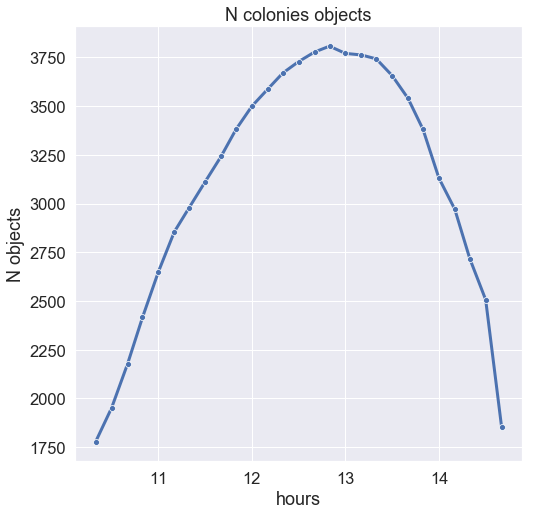

In [6]:
Count=Data.groupby(['hours']).apply(lambda x: len(x['area']))

sns.set(font_scale=1.5)
A=Count.reset_index('hours')
A=A.rename(columns={A.columns[1]:"Count"})

plt.figure(figsize=(8, 8))
plt.title("N colonies objects")
fig = sns.lineplot(x='hours', y="Count", data=A,marker='o', estimator=None,lw=3)
fig.set(xlabel='hours', ylabel='N objects')
plt.savefig("../results/for presentation/Ncolonies.png",bbox='tight')

<Figure size 1512x504 with 0 Axes>

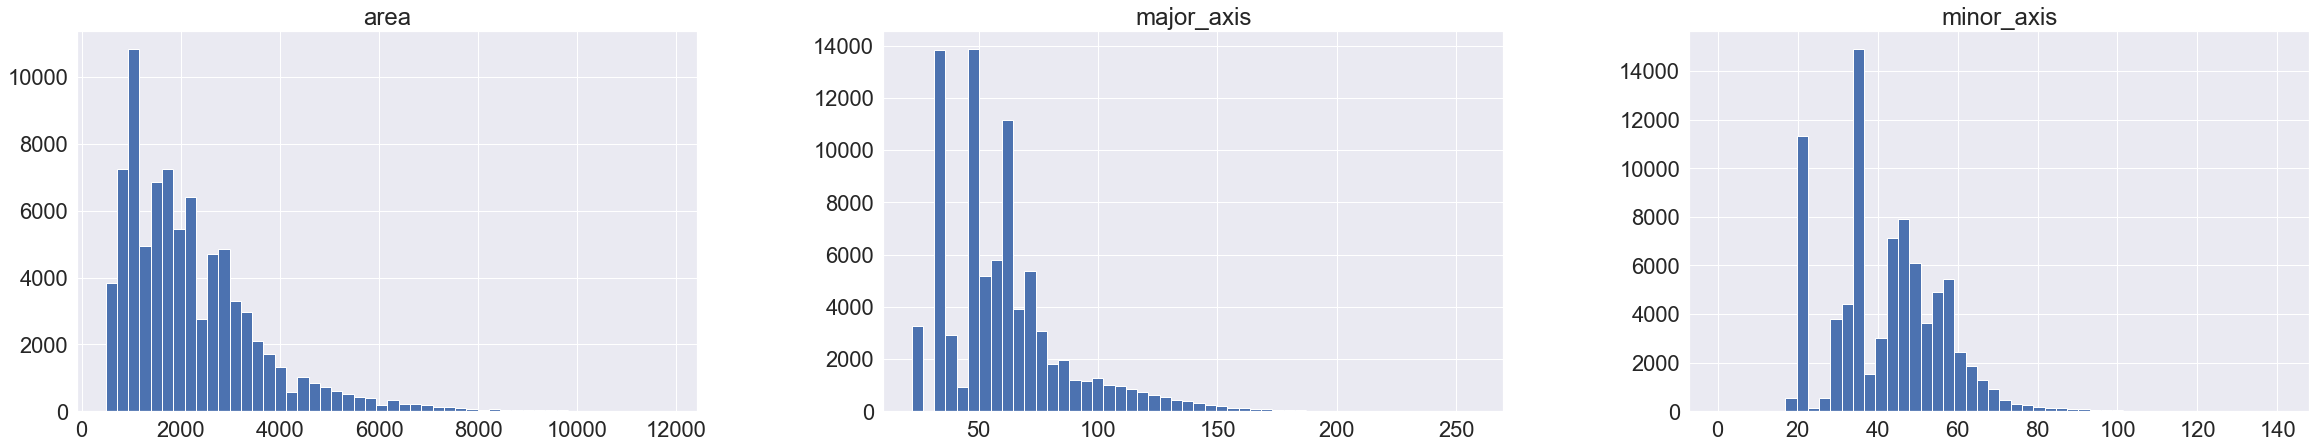

In [7]:
sns.set(font_scale=1.5)
plt.figure(figsize=(21,7))
sns.set(font_scale=2)

Data[["area","major_axis","minor_axis"]].hist(bins=50,layout=(1,3),figsize=(40,7))
plt.savefig("../results/for presentation/Hist_col_overview.png",bbox='tight')

In [8]:
def plot_2d_histogramme(attr,scale_label):
    path="../results/for presentation/"
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    # data
    x = Data.frame
    y = Data[attr]
    
    
    # Big bins
    sns.set(font_scale=1.5)
    fig,ax =plt.subplots(figsize=(10,8))
    pl=ax.hist2d(x, y, bins=[len(Data.frame.unique()),25], cmap=plt.cm.jet);
    ax.set_xlabel("frame")
    ax.set_ylabel(attr+"  "+scale_label)
    ax.set_title(attr)
    
    ax.grid(False)
    
    cbar=fig.colorbar(pl[3], ax=ax)
    cbar.set_label("counts ")

    fig.savefig(path+attr+"_2dhist.png",bbox_inches=None)
    
    

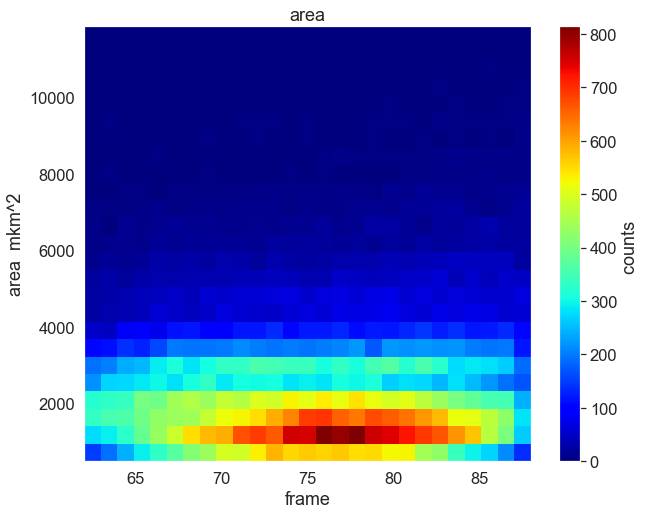

In [9]:
plot_2d_histogramme('area',"mkm^2")

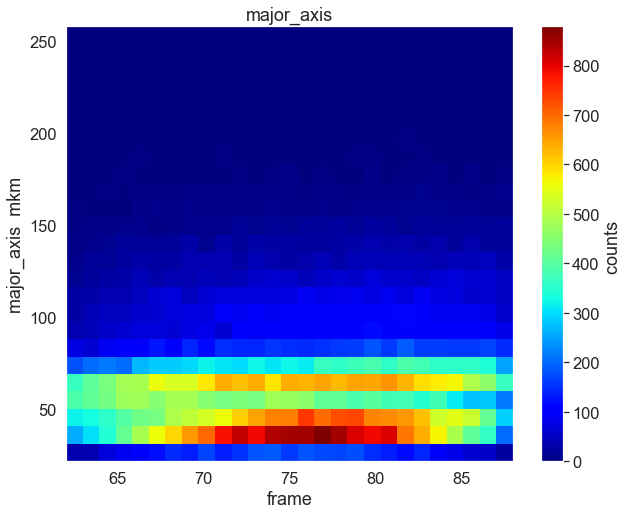

In [10]:
plot_2d_histogramme('major_axis',"mkm")

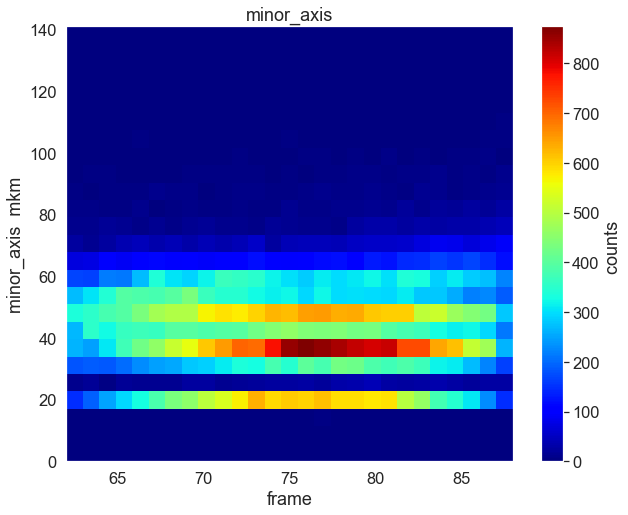

In [11]:
plot_2d_histogramme('minor_axis',"mkm")

In [12]:
Sample=Data.sample(n=100)

In [13]:
images=io.imread('../data/supplementaryMovie5_ancestor_ALI_segmented.tiff')

In [15]:


def plot_selected_region(region,images,ax):
    frame=region.frame
    dd=1
    max_row=images[0,:,:].shape[0]
    max_col=images[0,:,:].shape[1]
    minr=max(int(region.minr)-dd,0)
    maxr=min(int(region.maxr)+dd,max_row)
    minc=max(int(region.minc)-dd,0)
    maxc=min(int(region.maxc)+dd,max_col)
     
    ax.imshow(images[int(frame)-62,minr:maxr,minc:maxc])
    ax.set_title(str(region.area))
    ax.set_xticks([])
    ax.set_yticks([])

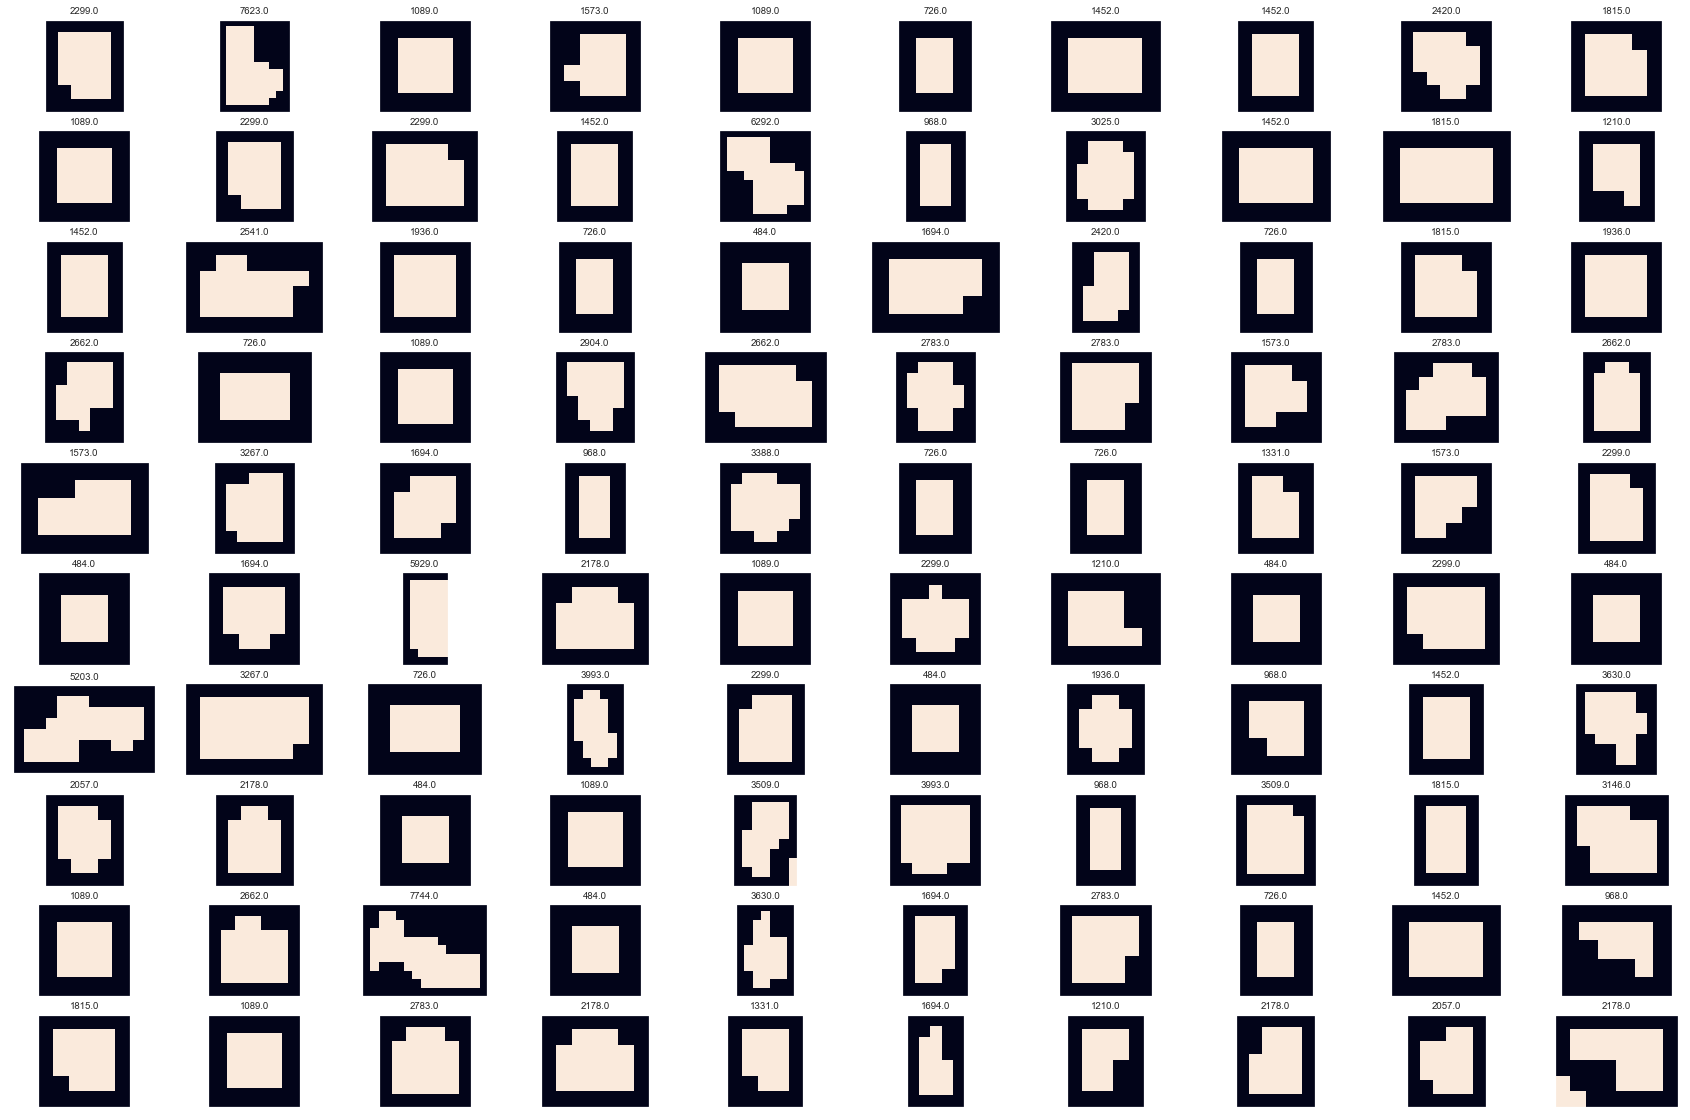

In [16]:

fig,ax=plt.subplots(ncols=10,nrows=10,figsize=(30,20))
sns.set(font_scale=0.8)
counter=0
for a in ax.ravel():
    region=Sample.iloc[counter,:]
    plot_selected_region(region,images,a)
    counter=counter+1
    
fig.savefig("../results/for presentation/100_Microcolonies_Sample.png",bbox='tight')

In [183]:
region

Unnamed: 0      104938.000000
index           104938.000000
point_id        104938.000000
frame               85.000000
area              2662.000000
minr                76.000000
minc              1012.000000
maxr                81.000000
maxc              1017.000000
r                   78.090909
c                 1013.954545
major_axis          66.065566
minor_axis          50.668935
perimeter           14.828427
eccentricity         0.641708
traj_id            225.000000
dist                 0.423742
Name: 31929, dtype: float64

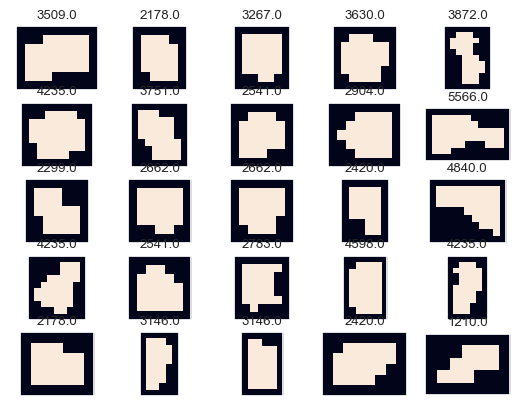

In [184]:
Selected=Data[(Data['major_axis']>50)]
Sample=Selected.sample(n=25, random_state=1)

fig,ax=plt.subplots(ncols=5,nrows=5)
sns.set(font_scale=0.8)
counter=0
for a in ax.ravel():
    region=Sample.iloc[counter,:]
    plot_selected_region(region,images,a)
    counter=counter+1

## Pair plot

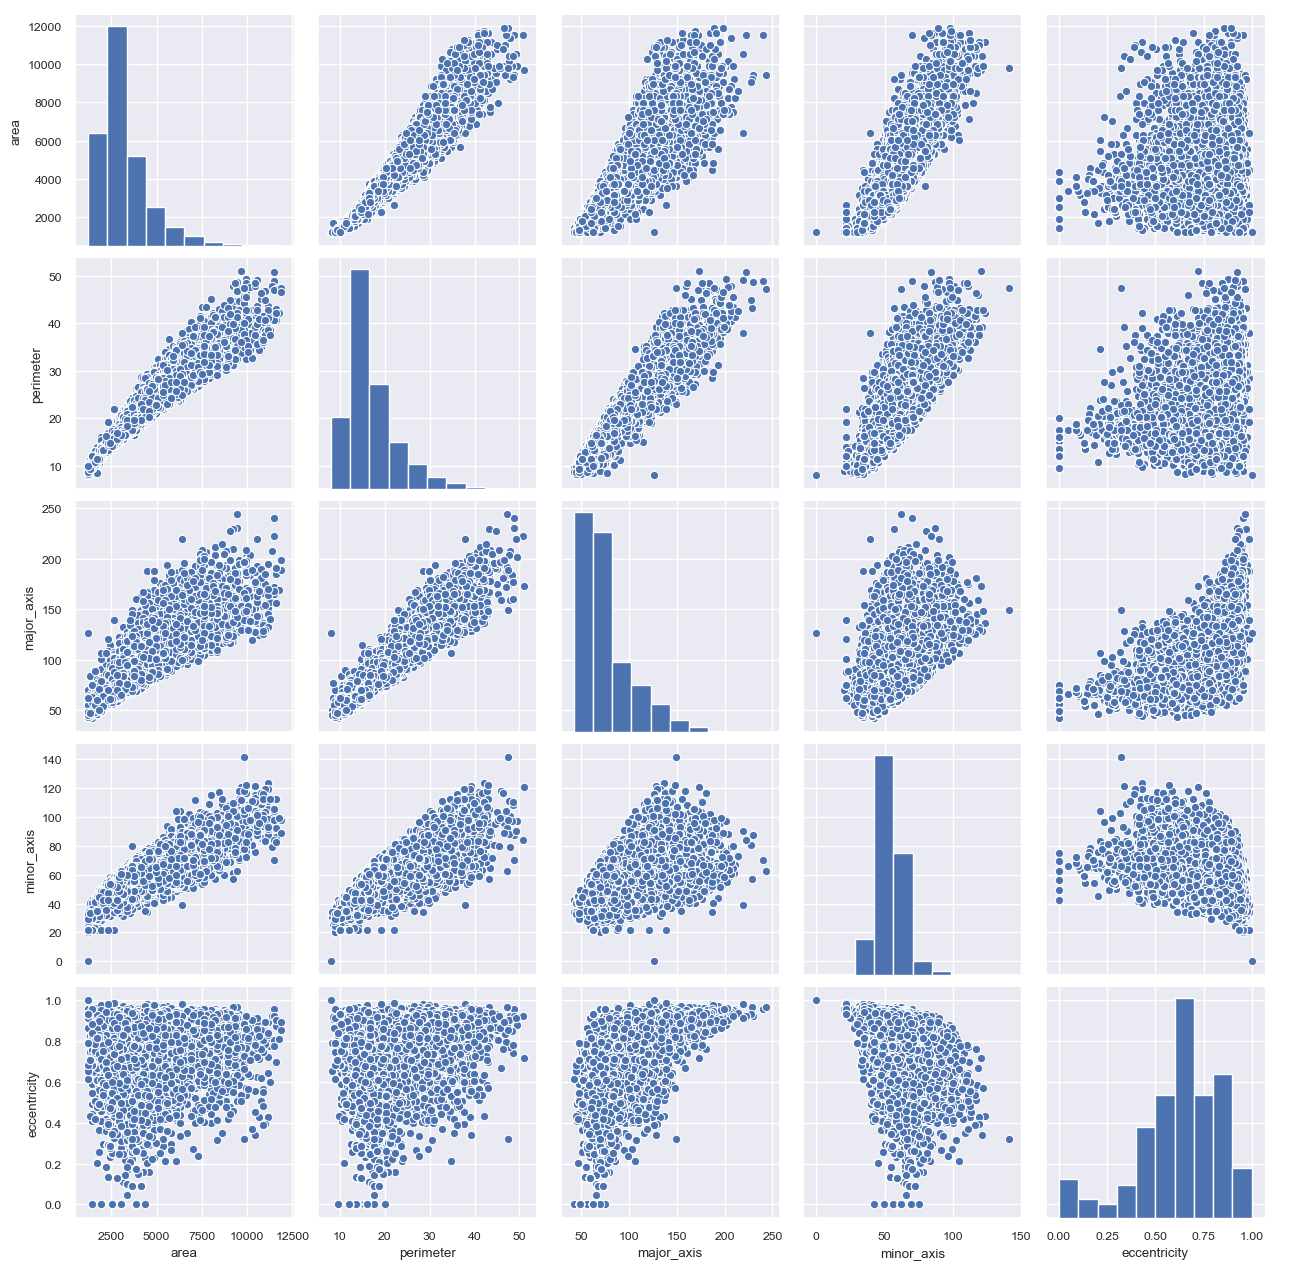

In [186]:
sns.pairplot(Data[["area","perimeter","major_axis","minor_axis","eccentricity"]])
plt.savefig("../results/for presentation/cor_plot.png")